### Question 3
This question asks us to solve Burgers' equation. Burger's equation is as follows. 




 This is done at first by discretizing time and space, notated by
 \begin{equation}
 \begin{array} { l l } { x _ { i } = i \Delta x , } & { i = 0 , \ldots , N _ { x } - 1 } \\ { t _ { j } = j \Delta t , } & { j = 0 , \dots , N _ { t } - 1 } \end{array}
\end{equation}
Then a partial differential equivalent of the leapfrog method, described by 
\begin{equation}
u _ { i } ^ { j + 1 } = u _ { i } ^ { j - 1 } - \frac { \beta } { 2 } \left[ \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } \right]
\end{equation}
An important part of this solution is that it requires the initial conditions for $ t = 0 $ and $ t = 1$ to be established prior to entering the loop. Those are as follows, given an initial condition, and a first leapfrog method. 
\begin{equation}
u _ { i } ^ {0 } = \sin(x_i)
\end{equation}
\begin{equation}
u _ { i } ^ {1 } = u _ { i } ^ {0} +  \Delta_t \cos(x_i)
\end{equation}
The code to solve this is as follows. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x_N = 2*np.pi  # size of length domain
t_N = 2        # size of time domain
x_delta = 0.02 # space step
t_delta = 0.005 #time step
# now generated arrays
x_space = np.arange(0,x_N,x_delta ) 
t_space = np.arange(0,t_N,t_delta )

epsilon = 1

In [14]:
u = np.zeros([len(x_space),len(t_space)])  # generate empty velocity array
beta = epsilon*t_delta/x_delta             # generalized step size
# initial conditions
for i in range(1,len(x_space)-1):       
    u[i,0] = np.sin(x_space[i])
    u[i,1] = u[i,0] + t_delta*np.cos(x_space[i])
# iterated solver
for j in range(1,len(t_space)-1):
    for i in range(1,len(x_space)-1):
            u[i,j+1] = u[i,j-1] - beta/2.0*(u[i+1,j]**2 - u[i-1,j]**2)

0.25


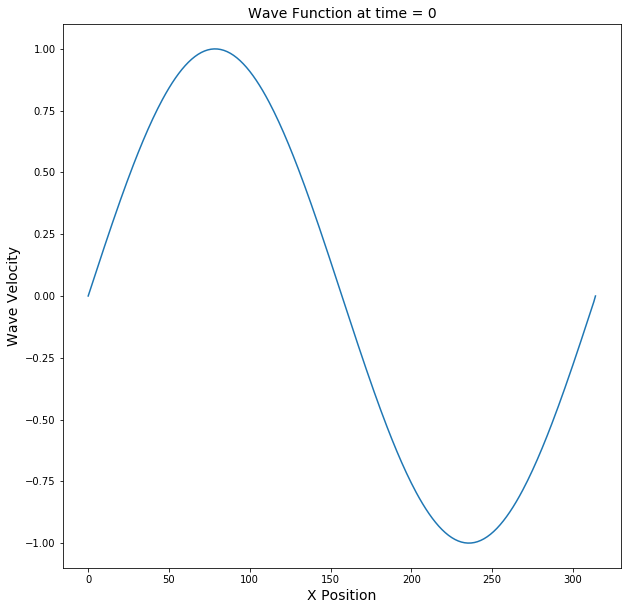

In [15]:
plt.figure(figsize = (10,10))
plt.plot(u[:,0])
plt.title('Wave Function at time = 0', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

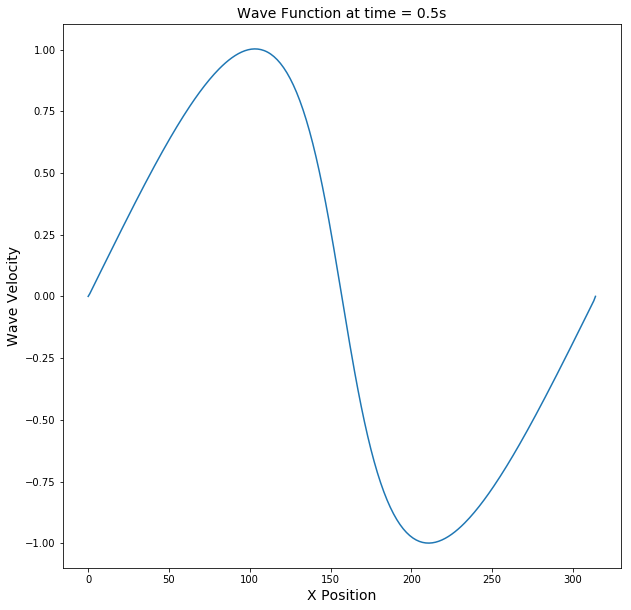

In [16]:
plt.figure(figsize = (10,10))
plt.plot(u[:,100])
plt.title('Wave Function at time = 0.5s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

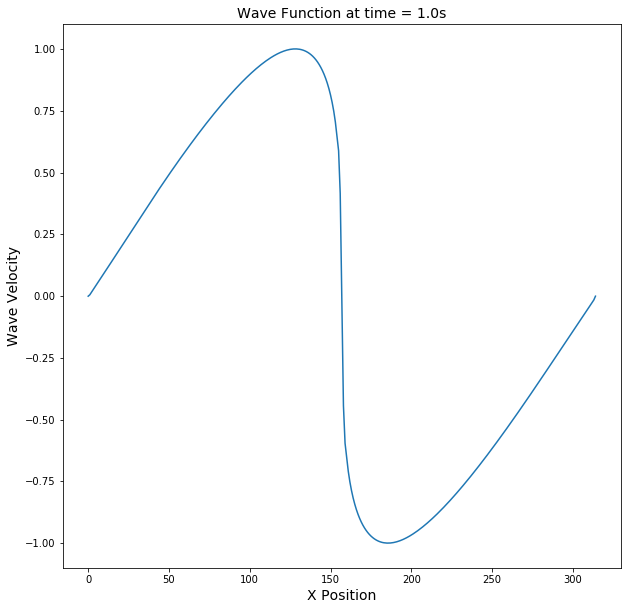

In [17]:
plt.figure(figsize = (10,10))
plt.plot(u[:,200])
plt.title('Wave Function at time = 1.0s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

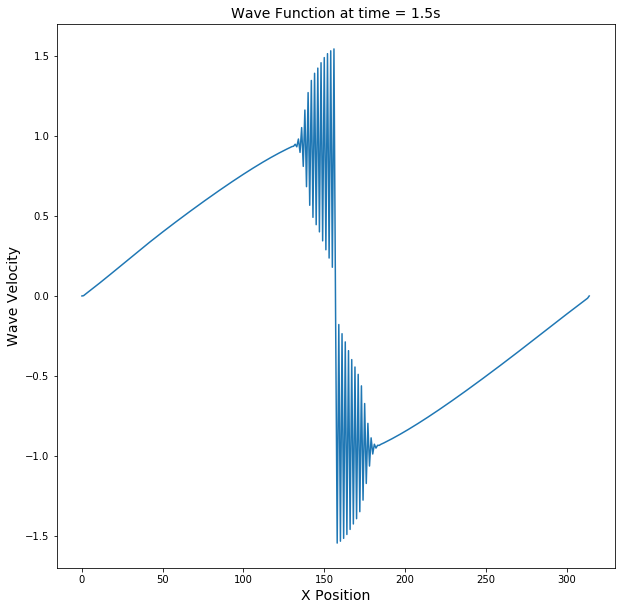

In [18]:
plt.figure(figsize = (10,10))
plt.plot(u[:,300])
plt.title('Wave Function at time = 1.5s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

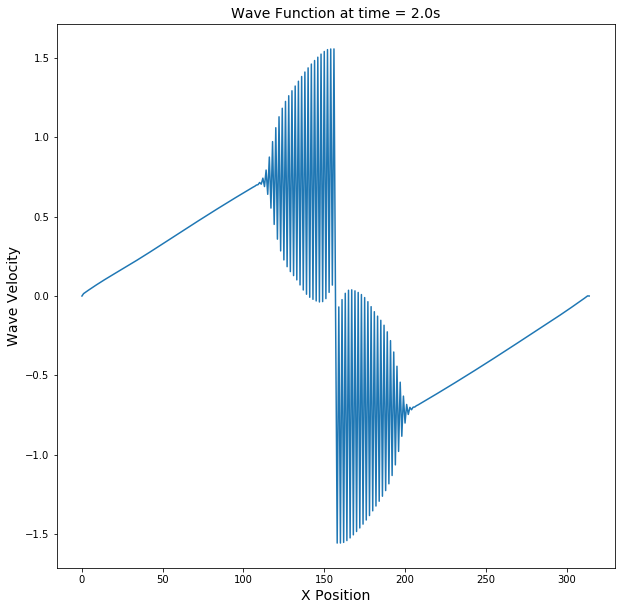

In [19]:
plt.figure(figsize = (10,10))
plt.plot(u[:,399])
plt.title('Wave Function at time = 2.0s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

### Question Three Comments about Unrealism
As the time delays, we see a bunching of the waves as the collide into the same place. Since the wave cannot have two parts in the same place(it cannot be a multivalued equation), there are some numerical issues with the prediction about the wave. You see artifacts of several wave packets trying to be on top of one another. You also this the straight boundary halway through the wave that seems to divide the two waves trying to interfere. 